# Projet numérique : choix du pas de temps
# Camille Klopocki, Damien Capéraa
## Pas fixe
### Question 1 : schéma d'Euler explicite

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def solve_euler_explicit(f, x0, dt, tf, t0=0):
    '''Résout l'équation différentielle dx/dt(t) = f(t, x) à l'aide de la
    méthode d'Euler explicite. Renvoie les listes temps et solution.'''
    T = tf - t0
    nbiter = math.floor(T/dt)
    temps = [i * dt for i in range(nbiter)]
    solution = [x0]
    for i in range(1, nbiter):
        solution.append(solution[i-1] + dt * f(i * dt, solution[i-1]))
    return temps, solution

Nous illustrons la convergence du schéma à l'ordre 1 en résolvant l'équation différentielle canonique $\dot x(t) = x(t) \;\; \forall t \in \left[t_{0}, t_{f}\right]$ et l'équation différentielle $\ddot x(t) = -x(t) \;\; \forall t \in \left[t_{0}, t_{f}\right]$. Les solutions réelles sont respectivement la fonction exponentielle et la fonction cosinus. \
Afin d'exhiber l'ordre d'un schéma, nous utilisons dans cette question et la suivante un affichage du logarithme en base 10 (ln en maths) du maximum des écarts de la solution numérique à la solution réelle en fonction de ln(dt), pour un dt décroissant. Nous obtenons une droite de pente l'ordre du schéma. \
$$\smash{\displaystyle\max_{0 \leqslant j \leqslant J}} \left\|x^{j} - x(t_{j})\right\| \leq c_{v}(\Delta t)^{p} \; \Rightarrow \; \ln\Big(\smash{\displaystyle\max_{0 \leqslant j \leqslant J}} \left\|x^{j} - x(t_{j})\right\|\Big) \leq \ln(c_{v}) + pln(\Delta t)$$

In [24]:
def convergence_euler(f, x0, tf, t0=0, nbiter=4):
    ''' Pour l'équation différentielle canonique dx/dt = x, retourne le log10
    du maximum des écarts à la solution réelle en fonction du log10 de dt.
    Permet une lecture graphique de l'ordre de convergence du schéma d'Euler
    explicite. Exécute le schéma d'Euler pour dt allant de 0.1 à
    0.1/10**nbiter.'''
    dt0 = 0.1 # initial value of dt
    list_dt = [dt0/(10**i) for i in range(nbiter)] # all tested dt
    max_difference = []
    for dt in list_dt:
        temps, num_solution = solve_euler_explicit(f, x0, dt, tf, t0)
        num_solution = np.array(num_solution)
        real_solution = np.array([np.exp(t) for t in temps])
        difference = abs(num_solution - real_solution)
        max_error = max(difference)
        max_difference.append(max_error)
    log_list_dt = np.log10(list_dt)
    log_max_difference = np.log10(max_difference)
    return log_list_dt, log_max_difference

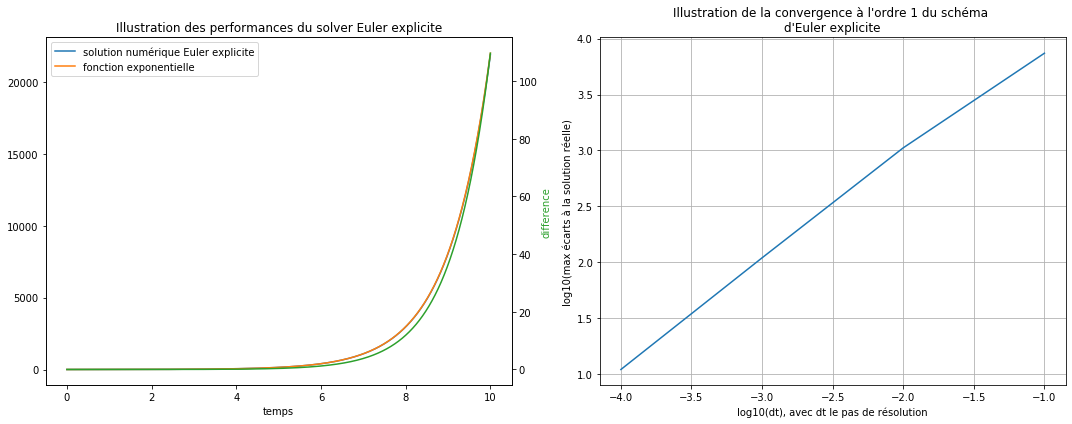

In [25]:
#Illustration des performances et détermination de l'ordre de convergence avec la fonction exponentielle.
f = lambda t, x : x
time, num_solution_euler = solve_euler_explicit(f, 1, 0.001, 10)
Y = np.exp(time)
Z = [y - x for y, x in zip(Y, num_solution_euler)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
log_list_dt, log_max_difference_euler = convergence_euler(f, 1, 10)
ax1.plot(time, num_solution_euler, label = 'solution numérique Euler explicite')
ax1.plot(time, Y, label = 'fonction exponentielle')
ax1.set_xlabel("temps")
ax1.set_title("Illustration des performances du solver Euler explicite")
ax1.legend()
ax3 = ax1.twinx()
ax3.plot(time, Z, color='tab:green')
ax3.set_ylabel('difference', color='tab:green')

ax2.plot(log_list_dt, log_max_difference_euler)
ax2.set_title("Illustration de la convergence à l'ordre 1 du schéma \nd'Euler explicite")
ax2.set(xlabel = 'log10(dt), avec dt le pas de résolution', ylabel = 'log10(max écarts à la solution réelle)')
ax2.grid(True)

fig.tight_layout()
plt.show()

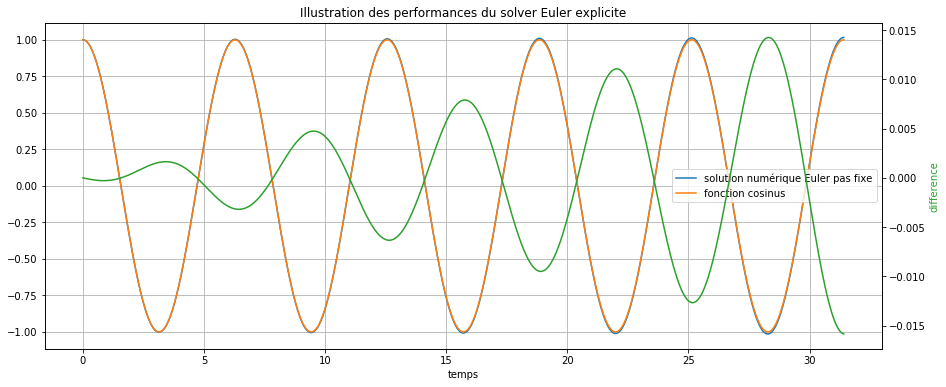

In [39]:
#Illustration des performances avec la fonction cosinus.
def g(t, X) :
    x, y = X[0], X[1]
    return np.array([y, -x])

time, num_solution_runge = solve_euler_explicit(g, np.array([1, 0]), 0.001, 10*np.pi)
x_new = [x[0] for x in num_solution_runge]
Y = np.cos(time)
Z = [y - z for y, z in zip(Y, x_new)]

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(time, x_new, label = 'solution numérique Euler pas fixe')
ax1.plot(time, Y, label = 'fonction cosinus')
ax1.set_xlabel("temps")
ax1.set_title("Illustration des performances du solver Euler explicite")
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(time, Z, color='tab:green')
ax2.set_ylabel('difference', color='tab:green')

ax1.grid(True)
plt.show()

Pour les deux illustrations, l'erreur par rapport à la solution réelle augmente lorsque t augmente bien que les deux courbes semblent parfaitement confondues.

### Question 2 : schéma de Runge-Kutta à l'ordre 2
Pour cette question, nous avons choisi le schéma de Runge-Kutta à l'ordre 2. Nous comparons l'ordre de convergence avec le schéma d'Euler explicite toujours sur l'équation différentielle canonique $\dot x(t) = x(t) \;\; \forall t \in \left[t_{0}, t_{f}\right]$.

In [27]:
def solve_runge_kutta_ordre_2(f, x0, dt, tf, t0=0):
    ''''Résout l'équation différentielle dx/dt(t) = f(t, x) à l'aide de la
    méthode de Rune_Kutta à l'ordre 2. Renvoie les listes temps et solution.'''
    T = tf - t0
    nbiter = math.floor(T/dt)
    temps = [i * dt for i in range(nbiter)]
    solution = [x0]
    for i in range(1, nbiter):
        F1 = f(i * dt, solution[i-1])
        F2 = f((i+1) * dt, solution[i-1] + dt * F1)
        solution.append(solution[i-1] + dt/2 * (F1 + F2))
    return temps, solution

In [28]:
def convergence_runge_kutta(f, x0, tf, t0=0, nbiter=4):
    ''' Pour l'équation différentielle canonique dx/dt = x, retourne le log10
    du maximum des écarts à la solution réelle en fonction du log10 de dt.
    Permet une lecture graphique de l'ordre de convergence du schéma de
    Runge-Kutta. Exécute le schéma de Runge-Kutta pour dt allant de 0.1 à
    0.1/10**nbiter.'''
    dt0 = 0.1 # initial value of dt
    list_dt = [dt0/10**i for i in range(nbiter)] # all tested dt
    max_difference = []
    for dt in list_dt:
        temps, num_solution = solve_runge_kutta_ordre_2(f, x0, dt, tf, t0)
        num_solution = np.array(num_solution)
        real_solution = np.array([np.exp(t) for t in temps])
        difference = abs(num_solution - real_solution)
        max_error = max(difference)
        max_difference.append(max_error)
    log_list_dt = np.log10(list_dt)
    log_max_difference = np.log10(max_difference)
    return log_list_dt, log_max_difference

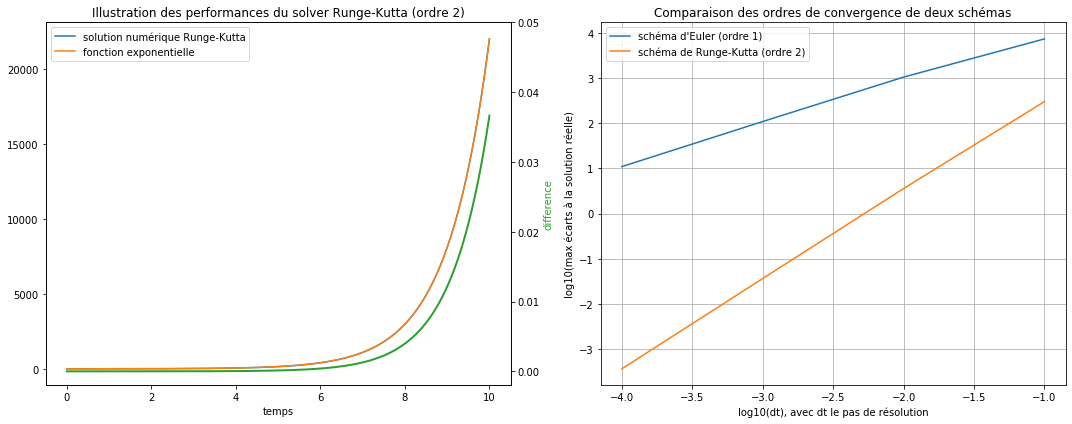

In [29]:
time, num_solution_runge = solve_runge_kutta_ordre_2(f, 1, 0.001, 10)
Y = np.exp(time)
Z = [y - x for y, x in zip(Y, num_solution_runge)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
log_list_dt, log_max_difference_runge = convergence_runge_kutta(f, 1, 10)

ax1.plot(time, num_solution_runge, label = 'solution numérique Runge-Kutta')
ax1.plot(time, Y, label = 'fonction exponentielle')
ax1.set_xlabel("temps")
ax1.set_title("Illustration des performances du solver Runge-Kutta (ordre 2)")
ax1.legend()
ax3 = ax1.twinx()
ax3.plot(time, Z, color='tab:green', linewidth=2)
ax3.set_ylabel('difference', color='tab:green')
ax3.set_ylim(-0.002, 0.050)

ax2.plot(log_list_dt, log_max_difference_euler, label = "schéma d'Euler (ordre 1)")
ax2.plot(log_list_dt, log_max_difference_runge, label = 'schéma de Runge-Kutta (ordre 2)')
ax2.set_title("Comparaison des ordres de convergence de deux schémas")
ax2.set(xlabel = 'log10(dt), avec dt le pas de résolution', ylabel = \
    'log10(max écarts à la solution réelle)')
ax2.legend()
ax2.grid(True)

fig.tight_layout()
plt.show()

Bien que la solution numérique et la solution réelle semblent parfaitement confondues, la difference augmente en réalité lorsque t augmente.

## Adaptation du pas de temps
### Question 3 : calcul de $\left\| e^{j+1} \right\|$ pour un schéma d'Euler explicite avec $f \;\mathcal{C}^{1}$

On a :
$$
\begin{align}
    e^{j+1} &= \bigg(x^j+\int_{t_{j}}^{t_{j+1}} f(s, x(s) ) ds\bigg)-\big(x^j+\Delta t_{j}f(t_{j},x^j)\big) \\
    &= \int_{t_{j}}^{t_{j+1}} f(s, x(s)) ds - \Delta t_{j}f(t_{j},x^j) 
\end{align}$$
            
On pose :
$$\begin{array}{ccccc}
g & : & \mathbb{R} & \to & \mathbb{R} \\
 & & t & \mapsto & \int_{t_{j}}^{t_{j+1}} f(s, x(s)) ds\\
\end{array} $$

Ainsi :
$$ e^{j+1} = g(t_{j+1}) - \Delta t_{j}f(t_{j},x^j) $$

Or par la formule de Taylor : 
$$ g(t_{j+1}) = g(t_{j} + \Delta t_{j}) = g(t_{j}) + \Delta t_{j} g'(t_{j}) +\frac{\Delta t_{j}^2}{2} g''(t_{j}) + O(\Delta t_{j}^3)$$\
\
Puis puisque le $x$ dans l'intégrale est la solution vraie initialisée à $x^j$ en $t_{j}$ : \
$$ 
\begin{align}
    g(t_{j+1}) &= \Delta t_{j} f(t_{j}, x^j) + \frac{\Delta t_{j}^2}{2} \bigg(\frac{\partial f}{\partial t}(t_{j}, x^j) + \frac {\partial f}{\partial x}(t_{j}, x^j)  \frac {dx}{dt}(t_{j})\bigg) + O(\Delta t_{j}^3)\\ 
    &= \Delta t_{j} f(t_{j}, x^j) + \frac{\Delta t_{j}^2}{2} \bigg(\partial_{t} f(t_{j}, x^j) + \partial_{x} f(t_{j}, x^j) f_{x}(t_{j}, x^j)\bigg) + O(\Delta t_{j}^3) 
\end{align}$$ \
\
On pose : $$ M_{j} = \partial_{t}f(t_{j}, x^j) + \partial_{x}f(t_{j}, x^j) f(t_{j}, x^j) $$ \
Ainsi : $$ g(t_{j+1}) = \Delta t_{j} f(t_{j}, x^j) + \frac{\Delta t_{j}^2}{2} M_{j} + O(\Delta t_{j}^3)$$ \
\
Or : $$ 
\begin{align}
    f(t_{j+1}, x^{j+1}) &= f(t_{j}, x^j) + \big(\partial_{t}f(t_{j}, x^j),\, \partial_{x}f(t_{j}, x^j)\big) . \begin{pmatrix}
\Delta t_{j} \\[1mm]
\Delta t_{j}f(t_{j}, x^j) \\
\end{pmatrix} + O(\Delta t_{j}^2)\\
&= f(t_{j}, x^j) + \partial_{t}f(t_{j}, x^j) \Delta t_{j} + \partial_{x} f(t_{j}, x^j) \Delta t_{j} f(t_{j}, x^j) + O(\Delta t_{j}^2)\\
&= f(t_{j}, x^j) + \Delta t_{j} M_{j} + O(\Delta t_{j}^2)
\end{align}$$ \
Ainsi : $$ M_{j} = \frac{f(t_{j+1}, x^{j+1}) - f(t_{j}, x^j)}{\Delta t_{j}} + O(\Delta t_{j})$$ \
\
On trouve donc : $$ 
\begin{align}
e^{j+1} &= \Delta t_{j} f(t_{j}, x^j) + \frac{\Delta t_{j}^2}{2} \bigg(\frac{f(t_{j+1}, x^{j+1}) - f(t_{j}, x^j)}{\Delta t_{j}} + O(\Delta t_{j})\bigg) + O(\Delta t_{j}^3) - \Delta t_{j} f(t_{j}, x^j) \\
&= \frac{\Delta t_{j}}{2} \big(f(t_{j+1}, x^{j+1}) - f(t_{j}, x^j)\big) + O(\Delta t_{j}^3) 
\end{align}$$\
Finalement :$$ \boxed{\left\| e^{j+1} \right\| = \frac{\Delta t_{j}}{2} \left\|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^j)\right\| + O(\Delta t_{j}^3)} $$


### Question 4 : adaptation du pas de temps

On a directement dans le calcul précédent que
$$\left\|e^{j+1}\right\| = \frac{\Delta t^{2}}{2}M_{j} + O(\Delta t^{3}) \;\; \Rightarrow \;\; \boxed{\left\|e^{j+1}\right\| = O(\Delta t^{2})}$$
car $M_{j}$ ne dépend pas de $\Delta t$.
Comme $\Delta t$ est petit, on peut approximer $\left\|e^{j+1}\right\|$ comme étant une fonction de $\Delta t^{2}$. Sachant que l'on veut avoir $\left\|e^{j+1}\right\| = Tol_{abs}$, il faut prendre un nouveau pas $\Delta t_{new}$ vérifiant :
$$\Delta t_{new}^{2} = \Delta t_{j}^{2} \, \frac{Tol_{abs}}{\left\|e^{j+1}\right\|} \;\; \Rightarrow \;\; \boxed{\Delta t_{new} = \Delta t_{j} \, \sqrt{\frac{Tol_{abs}}{\left\|e^{j+1}\right\|}}}$$

### Question 5 : solveur `solve_euler_explicit_variable_step`
Afin d'illustrer le fonctionnement de ce solveur, nous avons ajouté quelques commandes permettant de stocker les valeurs de l'erreur et de dt pour chaque itération.

In [30]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin=1e-16, dtmax=0.01, atol=1e-6):
    dt = dtmax/10 # initial integration step
    list_dt, list_errors = [], []
    ts, xs = [t0], [x0]  # storage variables
    t = t0  
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * math.sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            list_errors.append(ratio_abs_error)
            list_dt.append(dt)
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts.append(t_next)
        xs.append(x_next)
        t, ti, x = t_next, ti_next, x_next
    return ts, xs, list_dt, list_errors

Ce solveur permet une résolution numérique de l'équation différentielle $\dot x(t) = f(x(t)) \;\; \forall t \in \left[t_{0}, t_{f}\right]$ avec un pas de temps qui varie selon que l'erreur estimée à chaque itération est plus grande ou plus petite qu'une tolérance fixée à $atol$. Notons qu'ici t n'est plus une variable de f.
* $t_{i}$ permet de stocker la valeur de x dans xs avec un pas d'exactement $dt_{max}$. Ce solveur renvoie donc une solution échantillonnée à exactement $dt_{max}$.
* Pour faire le parallèle avec la question 3 :
    - $atol = Tol_{abs}$
    - $dt = \Delta t_{j}$
    - $x = x^{j}$
    - $x_{next} = x^{j+1}$ : application d'Euler explicite avec un pas dt.
    - $x_{back}$ vérifie $x_{next} = x_{back} + dtf(x_{next})$ et on a donc $\left\| x - x_{back} \right\| = dt \left\|f(x_{next}) - f(x)\right\| = dt\left\|f(x^{j+1}) - f(x^{j})\right\|$.
* On en déduit, avec la question 4 :
    - $ratio\_abs\_error = \frac{atol}{dt\frac{\left\|f(x_{next}) - f(x)\right\|}{2}} = \frac{Tol_{abs}}{\left\|e^{j+1}\right\|} = \Big(\frac{\Delta t_{new}}{\Delta t_j}\Big)^2$
    - Le solveur définit ainsi un nouveau `dt`, en ajoutant un facteur $0.9$ comme marge de sécurité : `dt = 0.9 * dt * sqrt(ratio_abs_error)`.
    - Le solveur vérifie que le nouveau `dt` se trouve bien dans $\left[dt_{min}, \frac{dt_{max}}{2}\right]$, avec une marge de sécurité sur la borne supérieure (permettant d'avoir au moins 2 itérations avant le stockage de la prochaine valeur). S'il est trop petit, une erreur est levée. S'il est trop grand, il est ramené à $\frac{dt_{max}}{2}$.\
\
Afin d'illustrer le fonctionnement de ce solveur, nous affichons l'évolution en fonction des itérations du pas dt et de l'erreur commise à chaque itération.

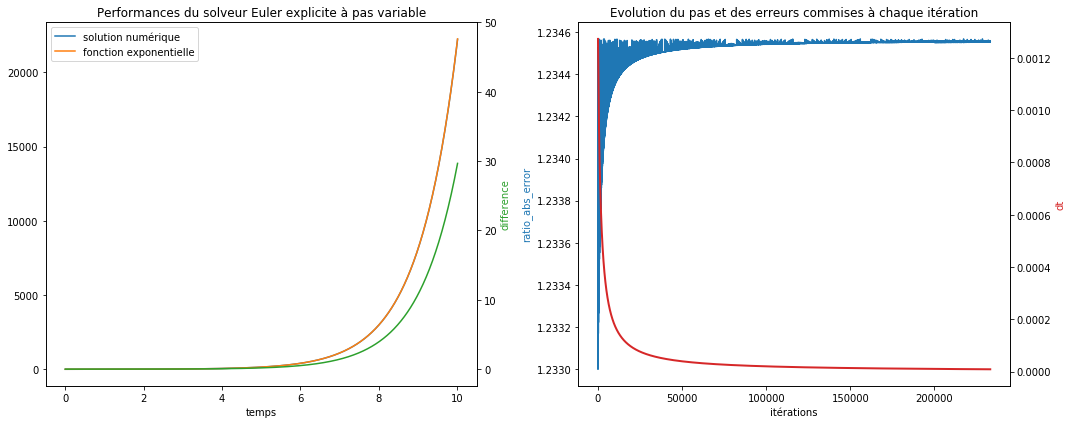

In [31]:
h = lambda x : x   # f ne dépendant pas de t
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
t, x, list_dt, list_errors = solve_ivp_euler_explicit_variable_step(h, 0, 1, 10)

Y = np.exp(t)
Z = [y - x for y, x in zip(Y, x)]
ax1.plot(t, x, label = "solution numérique")
ax1.plot(t, Y, label = "fonction exponentielle")
ax1.set_xlabel("temps")
ax1.legend()
ax1.set_title("Performances du solveur Euler explicite à pas variable")
ax3 = ax1.twinx()
ax3.plot(t, Z, color='tab:green')
ax3.set_ylabel('difference', color='tab:green')
ax3.set_ylim(-2.4, 50)

color = 'tab:blue'
ax2.set_xlabel('itérations')
ax2.set_ylabel('ratio_abs_error', color=color)
ax2.set_title("Evolution du pas et des erreurs commises à chaque itération")
ax2.plot(list_errors[1:], color=color)

color = 'tab:red'
ax4 = ax2.twinx()
ax4.plot(list_dt, color=color, linewidth=2.0)
ax4.set_ylabel('dt', color=color)

fig.tight_layout()
plt.show()

Le premier graphe montre que l'erreur par rapport à la solution réelle est plus importante avec la méthode d'Euler à pas variable qu'avec la méthode d'Euler explicite à pas fixe, ce qui est surprenant.
Le second graphe montre que `ratio_abs_error` reste supérieur à 1 tout au long du programme, ce qui signifie que l'erreur commise lors d'une itération est inférieure à la tolérance fixée à `atol`. C'est pourquoi le pas dt devrait noramlement augmenter : nous observons l'inverse, ce qui est inexplicable. \
Nous tentons de vérifier les performances de ce solver avec la fonction cosinus.

Text(0, 0.5, 'difference')

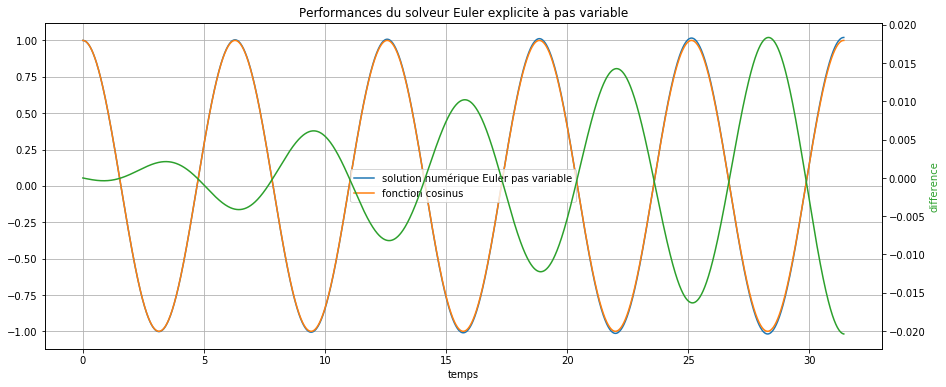

In [38]:
def w(X):
    x, y = X[0], X[1]
    return np.array([y, -x])
fig, ax1 = plt.subplots(figsize = (15, 6))
t, x, list_dt, list_errors = solve_ivp_euler_explicit_variable_step(w, 0, np.array([1, 0]), 10*np.pi)

x_new = [z[0] for z in x]
Y = np.cos(t)
Z = [y - z for y, z in zip(Y, x_new)]
ax1.plot(t, x_new, label = "solution numérique Euler pas variable")
ax1.plot(t, Y, label = "fonction cosinus")
ax1.set_xlabel("temps")
ax1.legend()
ax1.grid(True)
ax1.set_title("Performances du solveur Euler explicite à pas variable")
ax3 = ax1.twinx()
ax3.plot(t, Z, color='tab:green')
ax3.set_ylabel('difference', color='tab:green')

L'erreur est à nouveau plus grande avec cette méthode qu'avec la méthode du pas fixe ($0.02$ à $t=32$ contre $0.015$).